# One Hidden Layer
#### A neural network with one hidden layer, using NumPy for:

* Forward propagation

* Backward propagation

* Gradient descent

* Binary classification 

In [84]:
import numpy as np

## Activation functions
* sigmoid(z): Computes the sigmoid activation, often used in the output layer for binary classification problems.
        $$\text{sigmoid}(z) = \frac{1}{1 + e^{-z}}$$
* `sigmoid_derivative(a): Computes the derivative of the sigmoid function, used in backpropagation.
        $$\text{sigmoid\_derivative}(a) = a * (1 - a)$$
* relu(z): Computes the Rectified Linear Unit (ReLU) activation, commonly used in hidden layers.
        $$\text{relu}(z) = \text{max}(0, z)$$
* relu_derivative(z): Computes the derivative of the ReLU function.
        $$\text{relu\_derivative}(z) = \begin{cases} 1 & \text{if } z > 0 \\ 0 & \text{if } z \le 0 \end{cases}$$

In [85]:
# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

## Parameter Initialization
#### initialize_parameters(n_x, n_h, n_y): Initializes the weights (W1, W2) with small random values and biases (b1, b2) with zeros.
* `n_x`: Size of the input layer.
* `n_h`: Size of the hidden layer.
* `n_y`: Size of the output layer.

In [86]:
# Initialize parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return W1, b1, W2, b2


## Forward Propagation**
* `forward_propagation(X, W1, b1, W2, b2)`: Performs the forward pass through the network.
* Calculates the weighted sum (Z1) and activation (A1) for the hidden layer using ReLU.
* Calculates the weighted sum (Z2) and activation (A2) for the output layer using sigmoid.
* Stores intermediate values (`Z1`, `A1`, `Z2`, `A2`) in a `cache` for use in backpropagation.

In [87]:
# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, Z2, A2)
    return A2, cache

 ## Cost Computation
* `compute_cost(A2, Y)`: Calculates the binary cross-entropy cost, a common loss function for binary classification.
$$\text{Cost} = - \frac{1}{m} \sum_{i=1}^{m} \left( Y^{(i)} \log(A_2^{(i)} + 1e-8) + (1 - Y^{(i)}) \log(1 - A_2^{(i)} + 1e-8) \right)$$
(Note: `1e-8` is added for numerical stability to prevent log(0).)   

In [88]:
# Compute cost
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = - (1/m) * np.sum(Y * np.log(A2 + 1e-8) + (1 - Y) * np.log(1 - A2 + 1e-8))
    return np.squeeze(cost)

## Backward Propagation
* `backward_propagation(X, Y, W2, cache)`: Computes the gradients of the cost with respect to the weights and biases.
* Uses the `cache` from forward propagation.
* Calculates `dZ2`, `dW2`, `db2`, `dZ1`, `dW1`, and `db1`.

In [89]:
# Backward propagation
def backward_propagation(X, Y, W2, cache):
    m = X.shape[1]
    Z1, A1, Z2, A2 = cache

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

## Parameter Update
* `update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)`: Updates the network's parameters using gradient descent.
$$W_{new} = W - \text{learning\_rate} \times dW$$
$$b_{new} = b - \text{learning\_rate} \times db$$

In [90]:
# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

## Training Function
* `train(X, Y, n_h, num_iterations, learning_rate, print_cost)`: Orchestrates the training process.
* Initializes parameters.
* Iterates for a specified number of `num_iterations`, performing forward propagation, cost computation, backward propagation, and parameter updates.
* Optionally prints the cost at regular intervals.
* Returns the trained parameters and a list of costs over iterations.

In [95]:
# Training Function
def train(X, Y, n_h, num_iterations=20000, learning_rate=0.1, print_cost=False):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    W1, b1, W2, b2 = initialize_parameters(n_x, n_h, n_y)
    costs = []  

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, W1, b1, W2, b2)
        cost = compute_cost(A2, Y)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W2, cache)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i % 100 == 0:
            costs.append(cost)  
            if print_cost and i % 1000 == 0:
                print(f"Cost after iteration {i}: {cost:.4f}")

    return W1, b1, W2, b2, costs  


## Prediction Function
* `predict(X, W1, b1, W2, b2)`: Makes predictions on new data.
* Performs forward propagation.
* Classifies outputs as 0 or 1 based on a threshold of 0.5.

In [92]:
# Predict
def predict(X, W1, b1, W2, b2):
    A2, _ = forward_propagation(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)

### Example Usage (XOR Dataset)
An example demonstrating the training and prediction on an XOR dataset, showcasing the network's ability to learn non-linear decision boundaries.

In [97]:
# Example: XOR dataset
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])   # shape: (2, 4)
Y = np.array([[0, 1, 1, 0]])   # shape: (1, 4)

W1, b1, W2, b2, costs = train(X, Y, n_h=4, num_iterations=20000, learning_rate=0.1, print_cost=True)

# Predictions
predictions = predict(X, W1, b1, W2, b2)
print("Predictions:", predictions)
print("Actual:", Y)


Cost after iteration 0: 0.6931
Cost after iteration 1000: 0.3681
Cost after iteration 2000: 0.3498
Cost after iteration 3000: 0.3481
Cost after iteration 4000: 0.3475
Cost after iteration 5000: 0.3473
Cost after iteration 6000: 0.3472
Cost after iteration 7000: 0.3470
Cost after iteration 8000: 0.3470
Cost after iteration 9000: 0.3469
Cost after iteration 10000: 0.3469
Cost after iteration 11000: 0.3468
Cost after iteration 12000: 0.3468
Cost after iteration 13000: 0.3468
Cost after iteration 14000: 0.3468
Cost after iteration 15000: 0.3468
Cost after iteration 16000: 0.3467
Cost after iteration 17000: 0.3467
Cost after iteration 18000: 0.3467
Cost after iteration 19000: 0.3467
Predictions: [[0 0 1 0]]
Actual: [[0 1 1 0]]


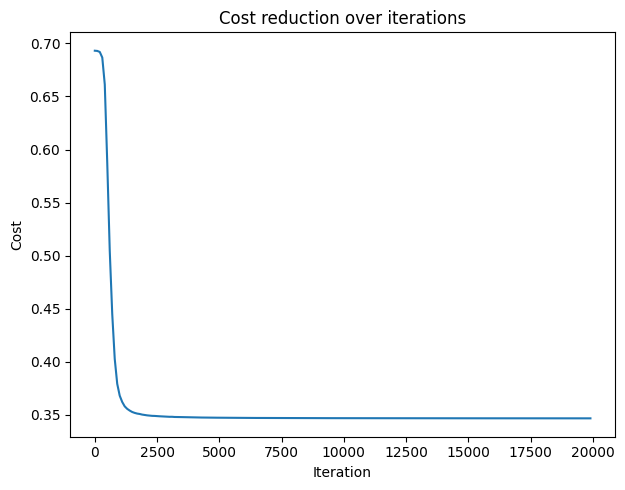

In [ ]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(12,5))

# Plot cost over iterations
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 20000, 100), costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost reduction over iterations")

plt.tight_layout()
plt.show()